<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/11%EC%9B%94_24%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

랜덤포레스트_손글씨분류

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

손글씨 데이터 로드

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

In [3]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
features.shape

(1797, 64)

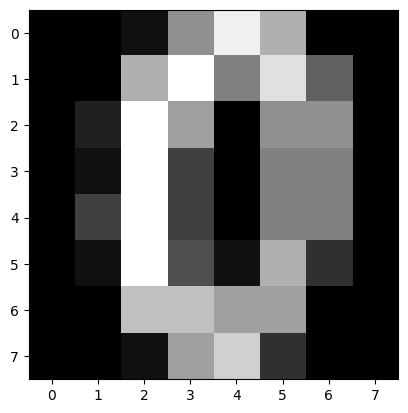

In [5]:
plt.imshow(features[10].reshape(8,8),cmap='gray')

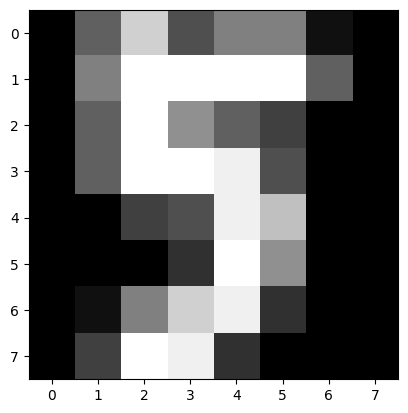

In [6]:
plt.imshow(features[33].reshape(8,8),cmap = 'gray')

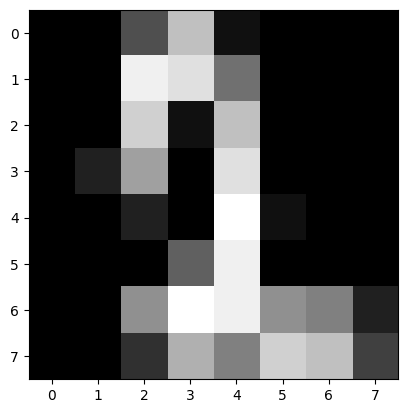

In [7]:
plt.imshow(features[12].reshape(8,8),cmap='gray')

In [8]:
labels  #features 정답

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
labels.shape

(1797,)

In [10]:
features[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

교차 검증

In [11]:
def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier,features, labels,cv=10,scoring='accuracy')
        cv_scores.append(scores.mean())

    return cv_scores # 10 개의 값이 반환될것임

In [12]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [14]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)